## Find Frequency Distributions with NLTK (1)

#### Kernel: Python 2

Today we will be learning how to use the Natural Language Toolkit (NLTK) module to perform basic text analysis. 

NLTK is a Python add-on package which has multiple useful functions for analyzing text files. One key component of text analysis is finding keyword frequency distributions.

A frequency distribution can be shown as a table containing how many times within a document different words appear. To directly quote the NLTK book, “it’s called a "distribution" because it tells us how the total number of word tokens in the text are distributed across the vocabulary items. Since we often need frequency distributions in language processing, NLTK provides built-in support for them” (http://www.nltk.org/book/ch01.html). 

Let’s get started.


### Lab1:
1. String Manipulation 
2. tokenization 
3. stop words removal

### Lab2:
3. stemming 
4. POS
5. N-grams
6. Tfidf



## String Manipulation 

In [1]:
dir(str)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


In [2]:
s = '  Hello '
s

'  Hello '

In [3]:
#remove spaces
s = s.strip()
s

'Hello'

In [4]:
#string indexing 
s[0]

'H'

In [5]:
s[-1]

'o'

In [6]:
s[:4]

'Hell'

In [7]:
s = s.lower()
s

'hello'

In [8]:
s.isalpha()

True

In [9]:
s.isdigit()

False

In [10]:
s = 'http:\\www.abc.com'
s.startswith('http')

True

In [11]:
s = 'I love coding'
s_list = s.split() #default deliminator is ' '(space) 
s_list

['I', 'love', 'coding']

In [12]:
new_string = '$$'.join(s_list)
new_string

'I$$love$$coding'

In [20]:
s.replace('  ','')

'I love coding'

In [18]:
s

'I love coding'

## Read data

In [21]:
# install add-on Natural Language Processing toolkit
# you only need to run it once in your device
!pip install nltk

In [22]:
import nltk
from nltk import FreqDist

#read file from local

#method 1
f = open('input.txt','rb')
raw = f.read()
raw = raw.decode('utf8') #decode raw text by utf-8

#method 2
f = open('input.txt','r+')
raw = f.read()

In [23]:
type (raw)

str

In [24]:
raw = raw.replace('\n',' ') 

## Tokenization 

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nicolasclarke/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
tokens = nltk.word_tokenize(raw)
type(tokens)

list

In [27]:
#change all tokens into lower case 
words1 = [w.lower() for w in tokens]   #list comprehension 

#only keep text words, no numbers 
words2 = [w for w in words1 if w.isalpha()]

In [28]:
#another way to create a new list: 
words1 = []
for w in tokens: 
    words1.append(w.lower())


In [29]:
#generate a frequency dictionary for all tokens 
freq = FreqDist(words2)

#sort the frequency list in descending order
sorted_freq = sorted(freq.items(),key = lambda k:k[1], reverse = True)
sorted_freq

[('the', 164044),
 ('i', 88163),
 ('and', 79852),
 ('a', 74673),
 ('to', 73528),
 ('is', 52940),
 ('it', 51578),
 ('of', 44185),
 ('camera', 44018),
 ('for', 35840),
 ('this', 34050),
 ('with', 33926),
 ('you', 33652),
 ('in', 32513),
 ('that', 29868),
 ('my', 23395),
 ('have', 23057),
 ('on', 20712),
 ('but', 20543),
 ('not', 17837),
 ('are', 16349),
 ('as', 16115),
 ('was', 15144),
 ('lens', 13716),
 ('be', 13294),
 ('if', 12101),
 ('at', 11941),
 ('can', 11900),
 ('so', 11405),
 ('canon', 10873),
 ('nikon', 10782),
 ('or', 10752),
 ('very', 10709),
 ('do', 10362),
 ('more', 10218),
 ('all', 10130),
 ('use', 10116),
 ('great', 9948),
 ('an', 9226),
 ('from', 9152),
 ('has', 9135),
 ('will', 9134),
 ('good', 8584),
 ('get', 8542),
 ('like', 8541),
 ('me', 8449),
 ('one', 8319),
 ('just', 8251),
 ('quality', 8093),
 ('than', 8011),
 ('about', 7997),
 ('pictures', 7921),
 ('out', 7747),
 ('when', 7666),
 ('lenses', 7660),
 ('would', 7386),
 ('had', 7182),
 ('some', 6831),
 ('which', 641

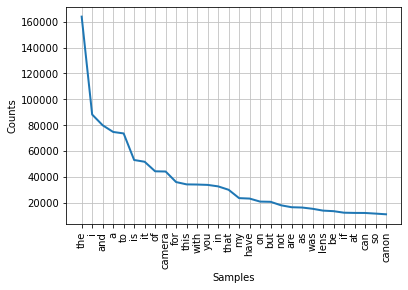

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [30]:
#If the this code does not show a figure, just try to run it twice
freq.plot(30)

## Stop words removal 

In [33]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nicolasclarke/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
from nltk.corpus import stopwords

stopwords = stopwords.words('english') #use the NLTK stopwords

In [35]:
#only keep the words that not in nltk stopwords word list
words_nostopwords = [w for w in words2 if w not in stopwords]

In [36]:
#generate a frequency dictionary for all tokens 
freq_nostw = FreqDist(words_nostopwords)

#sort the frequency list in decending order
sorted_freq_nostw = sorted(freq_nostw.items(),key = lambda k:k[1], reverse = True)
sorted_freq_nostw

[('camera', 44018),
 ('lens', 13716),
 ('canon', 10873),
 ('nikon', 10782),
 ('use', 10116),
 ('great', 9948),
 ('good', 8584),
 ('get', 8542),
 ('like', 8541),
 ('one', 8319),
 ('quality', 8093),
 ('pictures', 7921),
 ('lenses', 7660),
 ('would', 7386),
 ('better', 6378),
 ('also', 5964),
 ('cameras', 5842),
 ('much', 5814),
 ('really', 5647),
 ('digital', 5607),
 ('take', 5395),
 ('time', 5275),
 ('iso', 5263),
 ('even', 5197),
 ('dslr', 5142),
 ('video', 5082),
 ('well', 5041),
 ('shoot', 5028),
 ('focus', 4810),
 ('still', 4552),
 ('used', 4514),
 ('image', 4506),
 ('flash', 4490),
 ('shots', 4463),
 ('light', 4453),
 ('using', 4420),
 ('photos', 4338),
 ('price', 4304),
 ('first', 4276),
 ('shooting', 4194),
 ('mode', 4136),
 ('slr', 4132),
 ('new', 4090),
 ('want', 4082),
 ('features', 3850),
 ('buy', 3797),
 ('point', 3726),
 ('photography', 3709),
 ('many', 3645),
 ('need', 3609),
 ('body', 3593),
 ('battery', 3515),
 ('easy', 3503),
 ('images', 3467),
 ('kit', 3437),
 ('manual

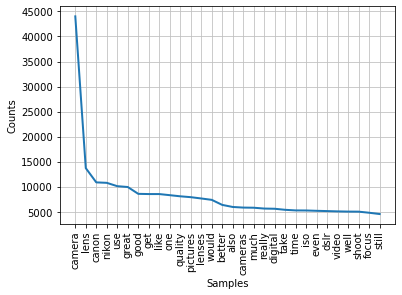

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [39]:
#If the this code does not show a figure, just try to run it twice
freq_nostw.plot(30)

## Save the result 

In [40]:
with open ('output.txt','a') as outfile:
    for line in sorted_freq_nostw:
        outfile.write(str(line[0])+'\t'+str(line[1])+'\n')

All done! Thanks for join me.